In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Applying ML regression algorithms
1. Linear
2. Lasso
3. KNN
4. Decision tree
4. RandomForest
5. Xgboost
6. Hyperparameter tuning
7. ANN


In [2]:
df=pd.read_csv('F:\DATA SCIENCE\Projects\AQI Delhi project\Data\Real_Data\Real_Combine.csv')

In [3]:
df.head() # the dataframe contains many null values but not in the PM 2.5 section as the PM data was taken from a different source

T    TM   Tm     SLP     H   VV    V    VM      PM 2.5
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4  219.720833
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1  182.187500
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1  154.037500
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6  223.208333
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2  200.645833

<AxesSubplot:>

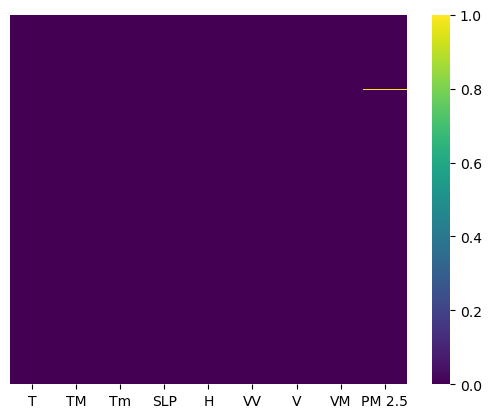

In [4]:
sns.heatmap(data=df.isnull(),yticklabels=False,cmap='viridis',cbar=True,)

In [5]:
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [6]:
df.dropna(inplace=True)
df.reset_index(drop=True)

T    TM    Tm     SLP     H   VV    V    VM      PM 2.5
0     7.4   9.8   4.8  1017.6  93.0  0.5  4.3   9.4  219.720833
1     7.8  12.7   4.4  1018.5  87.0  0.6  4.4  11.1  182.187500
2     6.7  13.4   2.4  1019.4  82.0  0.6  4.8  11.1  154.037500
3     8.6  15.5   3.3  1018.7  72.0  0.8  8.1  20.6  223.208333
4    12.4  20.9   4.4  1017.3  61.0  1.3  8.7  22.2  200.645833
..    ...   ...   ...     ...   ...  ...  ...   ...         ...
906  16.4  23.7   9.6  1020.6  82.0  0.5  2.8   9.4  284.166667
907  17.4  25.0  12.0  1020.8  76.0  0.8  1.3   9.4  288.416667
908  13.5  25.1   7.0  1017.8  79.0  1.0  3.9  13.0  166.916667
909  14.4  23.2   7.1  1017.7  74.0  1.3  2.0   7.6  169.000000
910  15.1  25.0   7.6  1017.1  71.0  1.3  3.5  13.0  186.041667

[911 rows x 9 columns]

<AxesSubplot:>

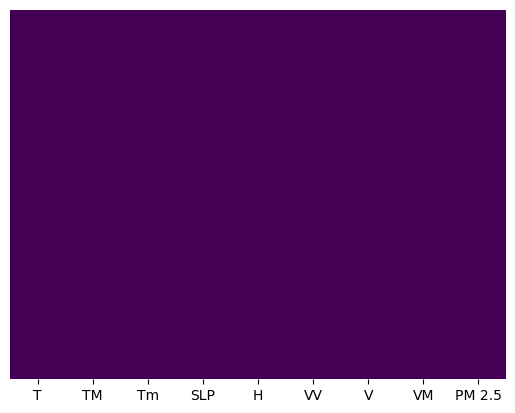

In [7]:
sns.heatmap(data=df.isnull(),yticklabels=False,cmap='viridis',cbar=False,)

In [8]:
df.dtypes

T         float64
TM        float64
Tm        float64
SLP       float64
H         float64
VV        float64
V         float64
VM        float64
PM 2.5    float64
dtype: object

In [9]:
X=df.iloc[:,:-1] # independant features
y=df.iloc[:,-1]  # independant feature

In [10]:
X.shape

(911, 8)

In [11]:
y.shape

(911,)

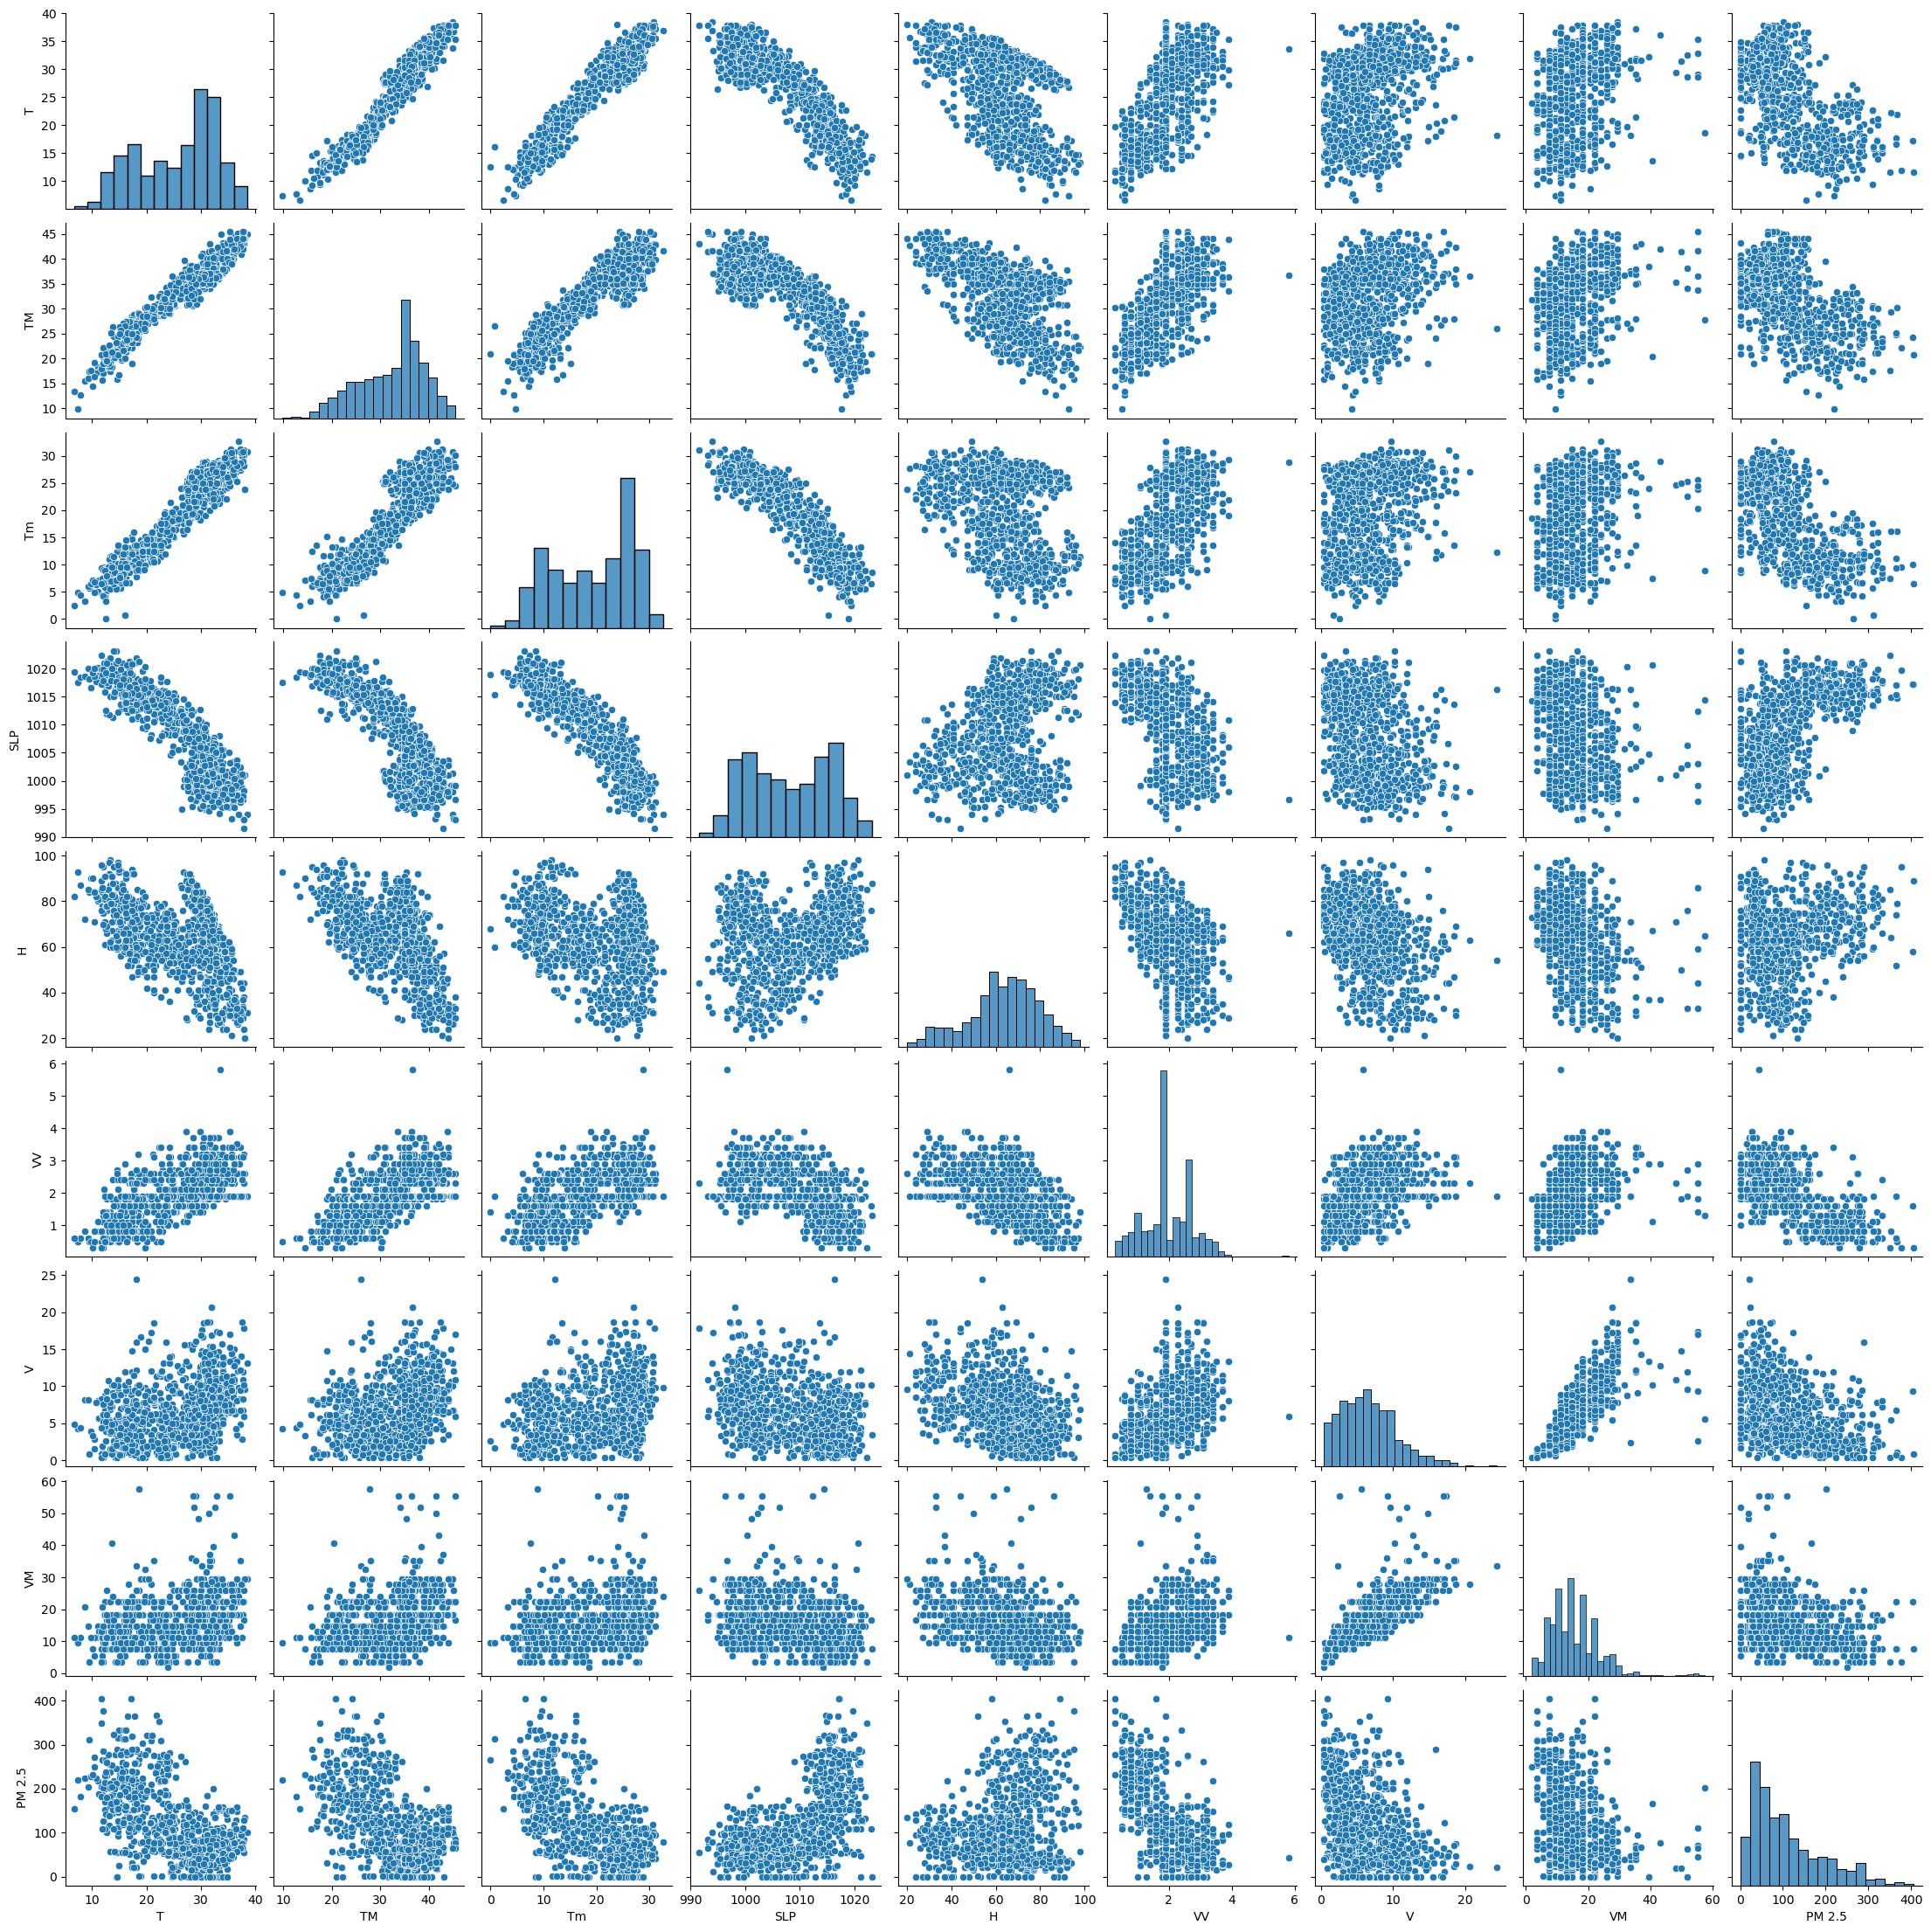

In [12]:
sns.pairplot(df)

In [13]:
df.corr()

T        TM        Tm       SLP         H        VV         V  \
T       1.000000  0.966049  0.956751 -0.887663 -0.509204  0.635980  0.319473   
TM      0.966049  1.000000  0.894330 -0.833470 -0.585415  0.603849  0.306306   
Tm      0.956751  0.894330  1.000000 -0.913640 -0.295194  0.563724  0.303747   
SLP    -0.887663 -0.833470 -0.913640  1.000000  0.259603 -0.512476 -0.330133   
H      -0.509204 -0.585415 -0.295194  0.259603  1.000000 -0.503179 -0.387655   
VV      0.635980  0.603849  0.563724 -0.512476 -0.503179  1.000000  0.416403   
V       0.319473  0.306306  0.303747 -0.330133 -0.387655  0.416403  1.000000   
VM      0.285654  0.294881  0.250938 -0.283389 -0.381898  0.368682  0.770795   
PM 2.5 -0.633319 -0.571977 -0.667541  0.623879  0.184367 -0.618415 -0.366337   

              VM    PM 2.5  
T       0.285654 -0.633319  
TM      0.294881 -0.571977  
Tm      0.250938 -0.667541  
SLP    -0.283389  0.623879  
H      -0.381898  0.184367  
VV      0.368682 -0.618415  
V       0.770795 -0.366337  
VM      1.000000 -0.300769  
PM 2.5 -0.300769  1.000000

From the correlation matrix we can see that PM 2.5 has +ve correlation with SLP(for increase in SLP value there is a probability of 0.605 for the value of SLP to increase), H and negative correlation with other features.

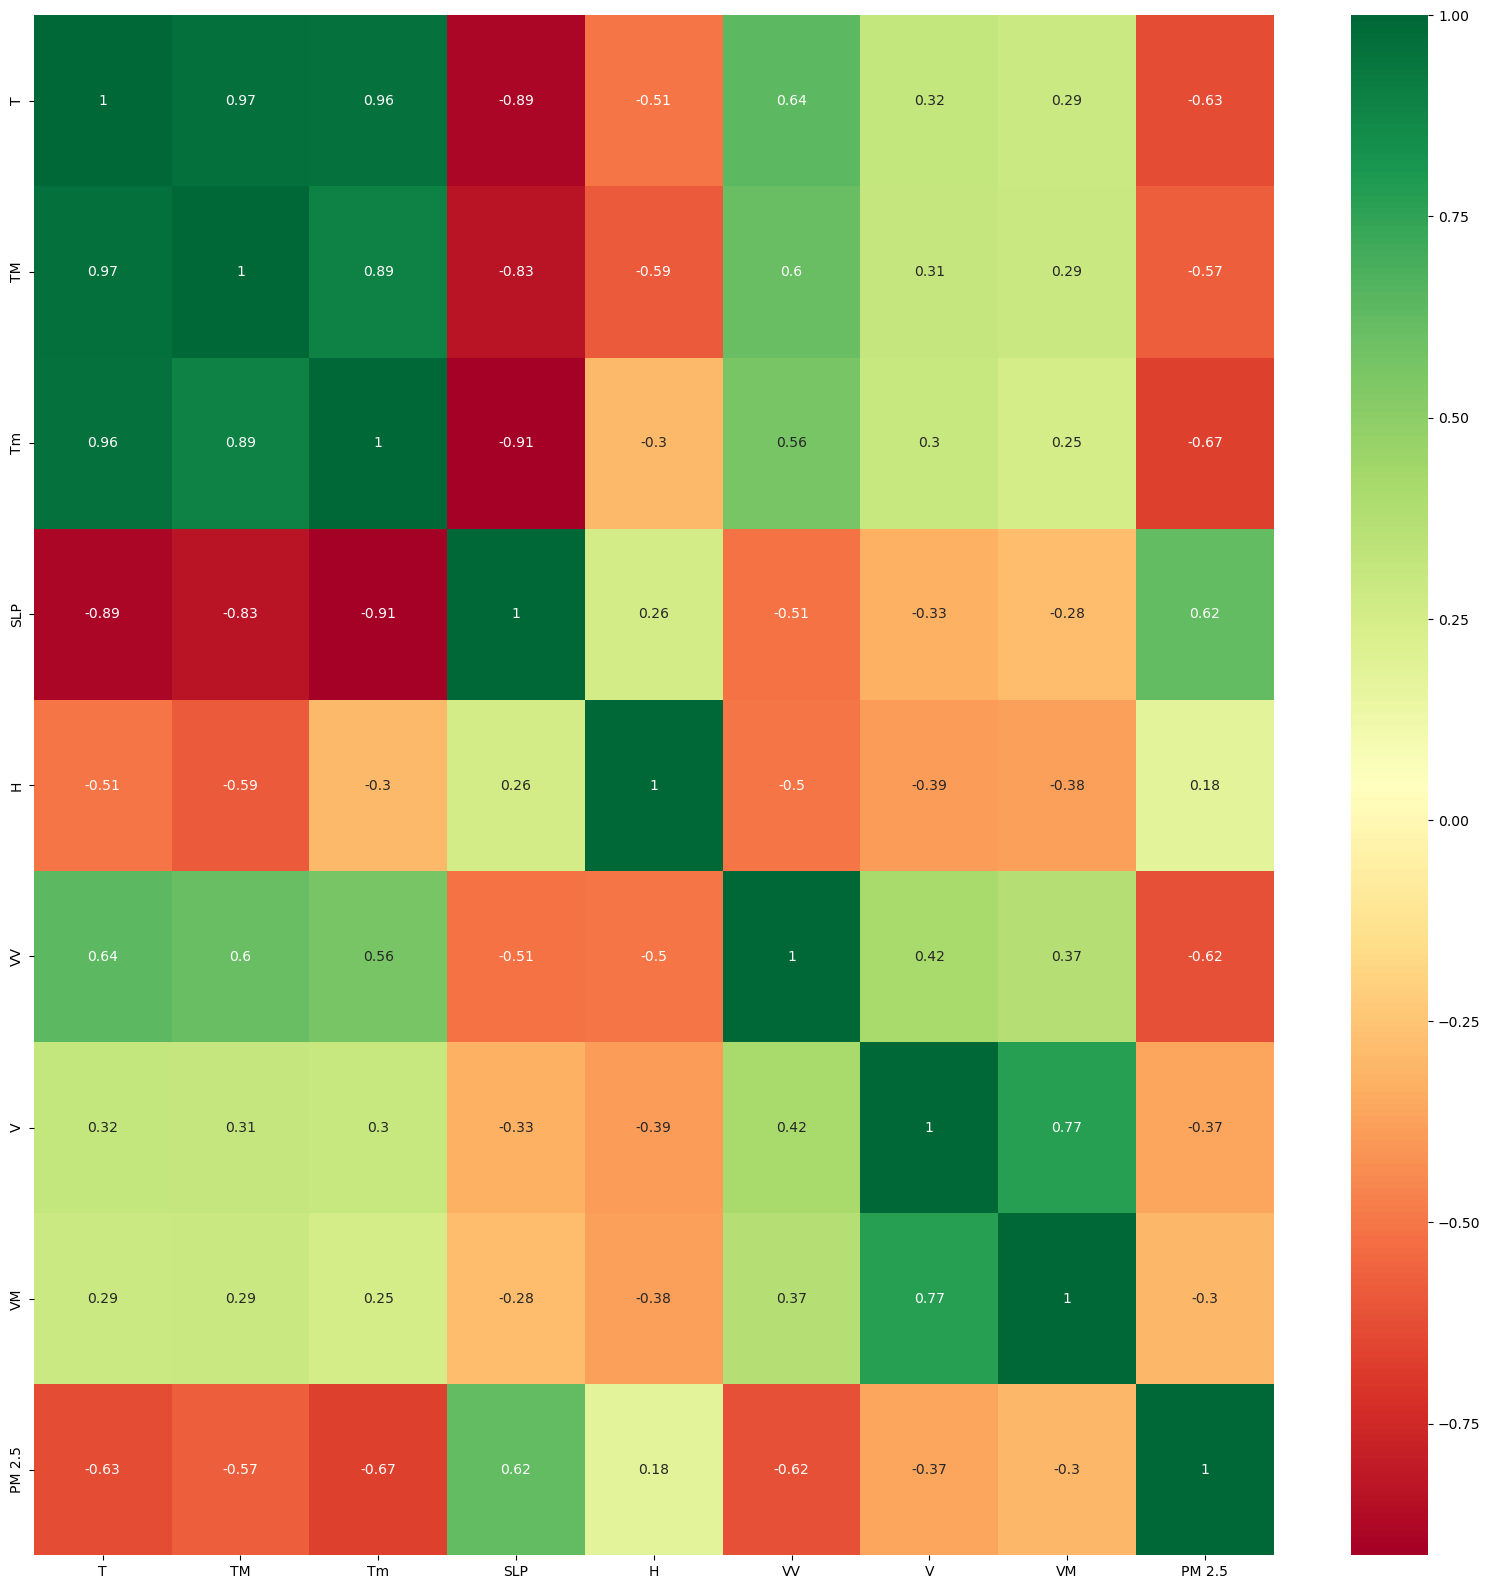

In [14]:
plt.figure(figsize=(20,20))
corr_mat=df.corr()
top_corr_features=corr_mat.index
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

##  when Seeking important features

Seeing the corr matrix we see that the feature H is not that important the others are much more important than H.

Feature importance is an inbuilt class with Tree Based Regressor like the Extra Tree regressor


In [15]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

the Extra Tree Regressor takes the 10 most important features but here the dataset being small it'll consider all the features an dwe'll also use every feature for prediction purpose.  n_estimator can be changed   .... It also helps in solving the problem of outliers

In [16]:
print(model.feature_importances_)

[0.16168083 0.09910999 0.17967964 0.1471276  0.0750554  0.24024446
 0.05603524 0.04106684]


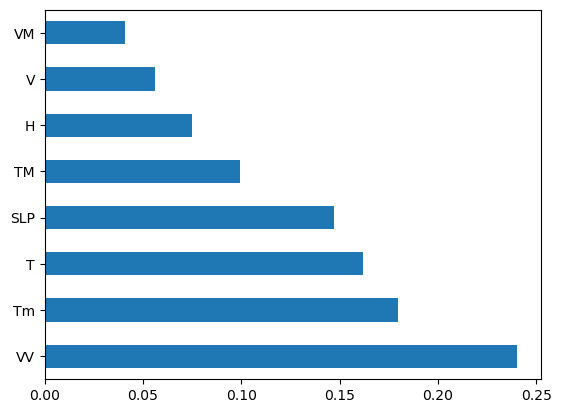

In [17]:
feature_importance=pd.Series(model.feature_importances_,index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.show()

c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

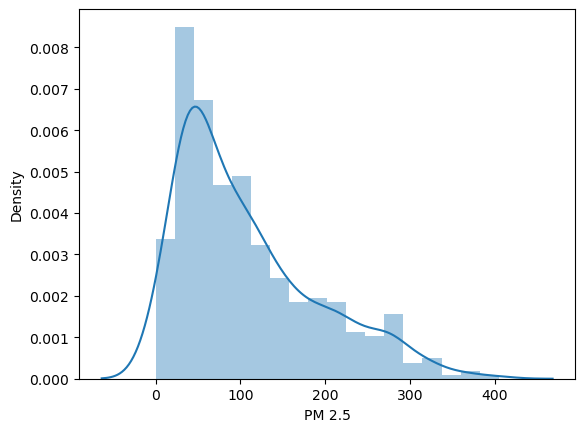

In [18]:
sns.distplot(y)

The output feature is right skewed

## Train test split

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=42)

### Preprocessing data by normalization min max scaler

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[0.48553055, 0.55182073, 0.465625  , ..., 0.14545455, 0.61748634,
        0.36445242],
       [0.5562701 , 0.63585434, 0.540625  , ..., 0.41818182, 0.25136612,
        0.16517056],
       [0.20257235, 0.31372549, 0.153125  , ..., 0.18181818, 0.06010929,
        0.10233393],
       ...,
       [0.56270096, 0.61344538, 0.471875  , ..., 0.41818182, 0.30054645,
        0.19928187],
       [0.93569132, 0.92997199, 0.821875  , ..., 0.41818182, 0.20218579,
        0.36445242],
       [0.77813505, 0.75630252, 0.7875    , ..., 0.38181818, 0.19125683,
        0.16517056]])

## Linear regression

In [21]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [22]:
print('coefficient of R^2 on train set-    {}'.format(regressor.score(X_train,y_train)))

coefficient of R^2 on train set-    0.584747752298911


In [23]:
print('coefficient of R^2 on train set-    {}'.format(regressor.score(X_test,y_test)))

coefficient of R^2 on train set-    0.5413190364189057


In [24]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [25]:
score.mean()

0.5360581404838299

#### model evaluation

In [26]:
coeff_df=pd.DataFrame(regressor.coef_,X.columns,columns=['coefficient'])
coeff_df  # .coef_ gives us the slope vals wrt independant features


coefficient
T       2.477866
TM     -0.666509
Tm     -6.379346
SLP     0.420745
H      -0.904482
VV    -45.744945
V      -1.896030
VM     -0.451925

inpreting the coeff values
1. with unit increase in the value of T value of AQI PM2.5 increases by 0.73
2. with unit increase in the value of TM value of AQI PM2.5 increases by 0.49
3. with unit increase in the value of Tm value of AQI PM2.5 decreases by 5.78
4. with unit increase in the value of SLP value of AQI PM2.5 increases by 0.53
5. with unit increase in the value of H value of AQI PM2.5 decreses by 0.73
6. with unit increase in the value of VV value of AQI PM2.5 decreses drastically by 43.45
7. with unit increase in the value of VM value of AQI PM2.5 increases by 0.089
8. with unit increase in the value of V value of AQI PM2.5 decreases by 1.92





In [27]:
y_pred=regressor.predict(X_test)

c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

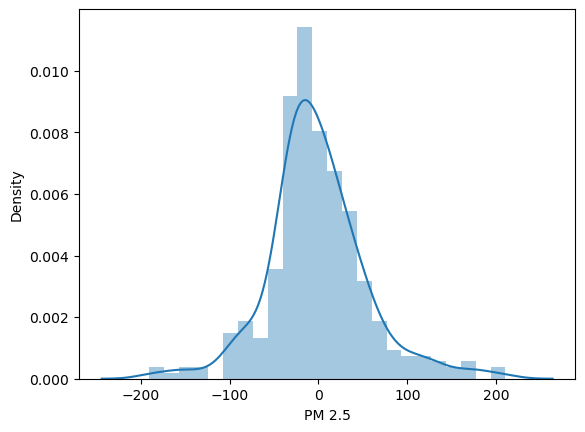

In [28]:
sns.distplot(y_test-y_pred)

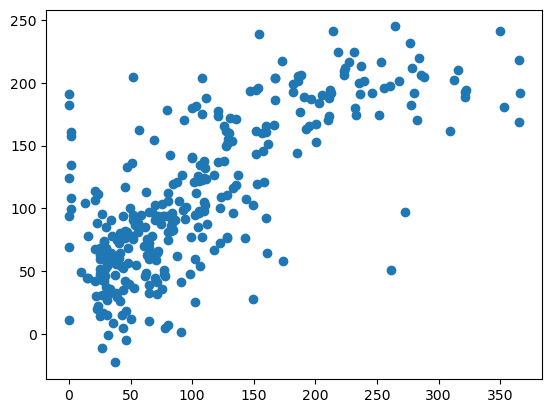

In [29]:
plt.scatter(y_test,y_pred)

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE: ',mean_absolute_error(y_test,y_pred))
print('MSE ', mean_squared_error(y_test,y_pred))
print('RMSE ',np.sqrt(mean_squared_error(y_test,y_pred)))

MAE:  40.39916749039232
MSE  3134.168069146323
RMSE  55.98364108510916


In [31]:
import pickle
file=open('regression_model.pkl','wb')
pickle.dump(regressor,file)

In [32]:
lin_regeres=LinearRegression()
mse=cross_val_score(lin_regeres,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-3214.976273744179


## Ridge Regression

In [33]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,param_grid=params,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [34]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-3182.2795846430354


## Lasso regression

In [35]:
from sklearn.linear_model import Lasso
lasso=Lasso()
params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_reg=GridSearchCV(lasso,param_grid=params,scoring='neg_mean_squared_error',cv=5)
lasso_reg.fit(X,y)
print(lasso_reg.best_estimator_)
print(lasso_reg.best_score_)

c:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.127e+06, tolerance: 5.073e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.081e+06, tolerance: 5.084e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.145e+06, tolerance: 5.008e

Lasso(alpha=1)
-3186.4654321596563


## model Evaluation

In [36]:
y_pred=lasso_reg.predict(X_test)

c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

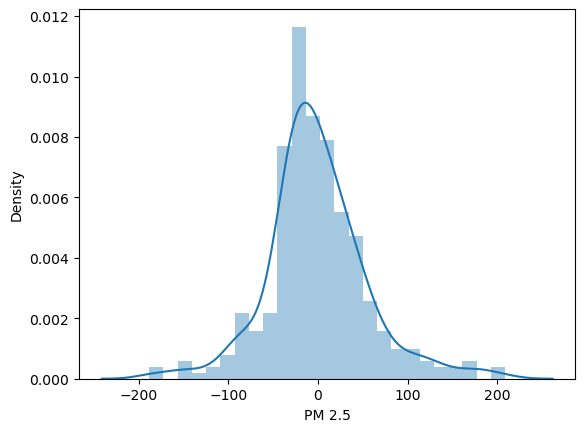

In [37]:
sns.distplot(y_test-y_pred)

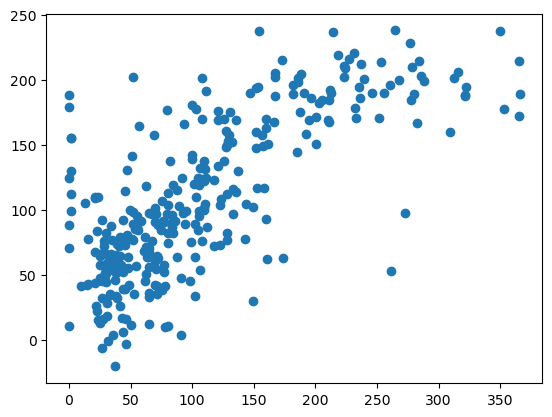

In [38]:
plt.scatter(y_test,y_pred)

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE: ',mean_absolute_error(y_test,y_pred))
print('MSE ', mean_squared_error(y_test,y_pred))
print('RMSE ',np.sqrt(mean_squared_error(y_test,y_pred)))

MAE:  40.14472696150881
MSE  3108.79011616281
RMSE  55.75652532361401


In [40]:
file=open('LassoRegression_model.pkl','wb')
pickle.dump(lasso_reg,file)